In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-1-27186f8f8710>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
ts_series=pd.read_csv("GOOG.csv",header=0, index_col=0,parse_dates=True,squeeze=True )

In [6]:
ts_series.head()

Date
2015-06-08    526.830017
2015-06-09    526.690002
2015-06-10    536.690002
2015-06-11    534.609985
2015-06-12    532.330017
Name: Close, dtype: float64

In [8]:
ts_series.dtypes

dtype('float64')

In [9]:
ts_series.iloc[0]

526.830017

In [11]:
ts_series.loc["2015-06-08"]

526.830017

In [12]:
ts_series.isnull().sum()

0

In [13]:
ts_series.shape

(1262,)

In [14]:
ts_series.describe()

count    1262.000000
mean      983.451723
std       232.283568
min       516.830017
25%       769.252502
50%      1021.044983
75%      1163.472442
max      1526.689941
Name: Close, dtype: float64

# Q1

Defining SL problem using sliding window method. This is because mostly stock prices of previous day affects the price the next day. We can see that the previous time step is the input (t) and the next time step is the output (t+1) in our supervised learning problem.

In [16]:
values = pd.DataFrame(ts_series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

            t         t+1
0         NaN  526.830017
1  526.830017  526.690002
2  526.690002  536.690002
3  536.690002  534.609985
4  534.609985  532.330017


# Q2

we have first row as missing value therefore it will be dropped when using it in model or for other analysis

# Q3

<AxesSubplot:xlabel='Date'>

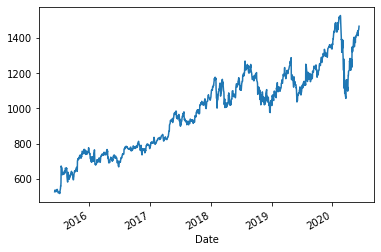

In [20]:
ts_series.plot()

<AxesSubplot:xlabel='Date'>

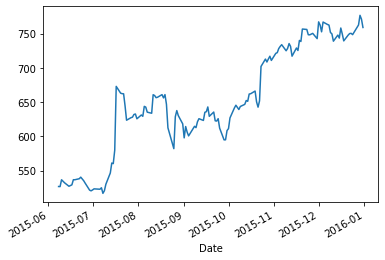

In [21]:
ts_series.loc['2015-06-08':'2016-01-01'].plot()

series seems to be tredning in the upward direction every year with some cycles

<AxesSubplot:>

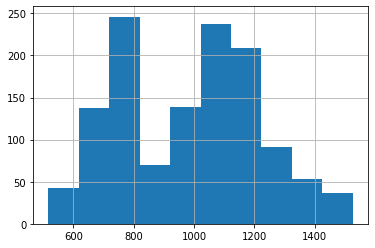

In [22]:
ts_series.hist()

In [23]:
ts_series.describe()

count    1262.000000
mean      983.451723
std       232.283568
min       516.830017
25%       769.252502
50%      1021.044983
75%      1163.472442
max      1526.689941
Name: Close, dtype: float64

Based on the mean above as it is not zero, we can say that this series is not a white noise.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

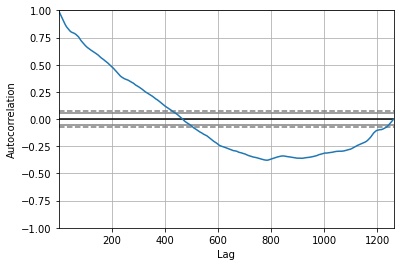

In [26]:

# autocorrelation
autocorrelation_plot(ts_series)


We see there is no autocorrelation

# Q4

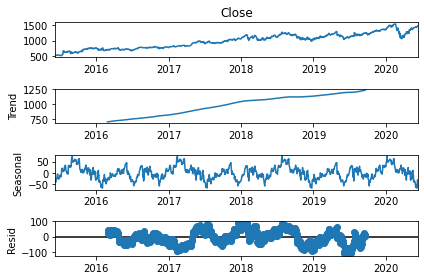

In [12]:
result = seasonal_decompose(ts_series, model='additive', freq=365)
result.plot()
plt.show()

We see an upward trend in the data as time increases
Based on the seasonal graph we can see that there are seasonal components whch needs to be removed


In [13]:
result.seasonal

Date
2015-06-08   -36.945293
2015-06-09   -40.932859
2015-06-10   -38.374301
2015-06-11   -31.984088
2015-06-12   -24.853977
                ...    
2020-06-04   -57.306440
2020-06-05   -65.980073
2020-06-08   -66.563866
2020-06-09   -31.120890
2020-06-10   -30.789077
Name: seasonal, Length: 1262, dtype: float64

In [18]:
result.resid.describe()

count    898.000000
mean      -4.988489
std       43.192150
min     -113.744881
25%      -36.350021
50%       -6.362651
75%       28.940746
max       91.973093
Name: resid, dtype: float64

We see that residuals mean is not 0 deeming the forecasts as biased.

# Q5

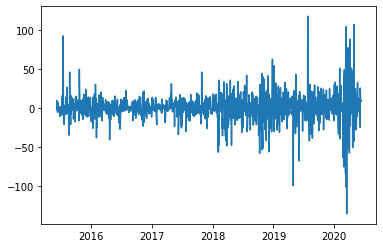

In [162]:
X = ts_series.values
df=pd.DataFrame(ts_series)
df.columns=['stock']
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)


pd.DataFrame(ts_series)
df.columns=['stock']
updated_df = df.drop(df.index[0])
updated_df["detrended_Stock"] = diff

plt.plot(updated_df["detrended_Stock"])
plt.show()


we did differencing or order 1 because now the series is detrended and seasonality removed as shown in the plot above. if there weere still trend or seasonlity remaining after 1 level differencing then we would have applied another differencing

# Q6

In [41]:
result3=adfuller(diff)
print('ADF Statistic: %f'%result3[0])
print('p-value : %f'%result3[1])
print(' Citical Values:')
for key , value in result3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.125478
p-value : 0.000000
 Citical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


since p value is less than 5% siginficance level there we reject null hypothesis of series being non-stationary. Therefore series is now stationary

In [43]:
len(diff)

1261

In [165]:
updated_df.shape

(1261, 2)

In [153]:
updated_df.head()

,stock,detrended_Stock
Date,,
2015-06-09,526.690002,-0.140015
2015-06-10,536.690002,10.000000
2015-06-11,534.609985,-2.080017
2015-06-12,532.330017,-2.279968
2015-06-15,527.200012,-5.130005


# Q7

In [172]:
updated_df=updated_df.drop(columns="stock")

In [173]:
updated_df.head()

,detrended_Stock
Date,
2015-06-09,-0.140015
2015-06-10,10.000000
2015-06-11,-2.080017
2015-06-12,-2.279968
2015-06-15,-5.130005


Define a simple function for our persistence model which means that we give input and output the same.

In [178]:
def persistence_model(x):
    return x

In [175]:
values = pd.DataFrame(updated_df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

           t        t+1
0        NaN  -0.140015
1  -0.140015  10.000000
2  10.000000  -2.080017
3  -2.080017  -2.279968
4  -2.279968  -5.130005


In [176]:
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [179]:
predictions = list()
for x in test_X:
    yhat = persistence_model(x)
    predictions.append(yhat)
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 22.194


 We used a walk-forward validation method. Once predictions are made for each time step in the test dataset, they are compared to the expected values and a Root Mean Squared Error (RMSE) score is calculated.

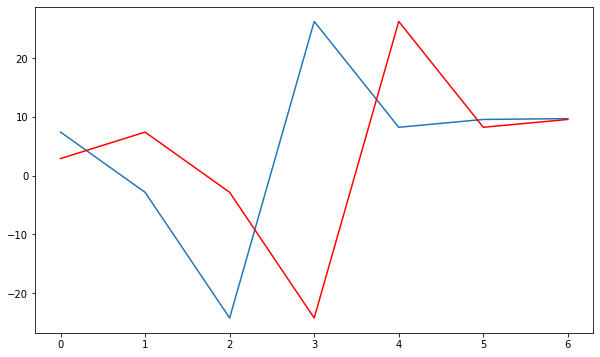

In [180]:
# plot predictions vs expected
plt.figure(figsize=(10,6))
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

# Q8

## Check auto correlation

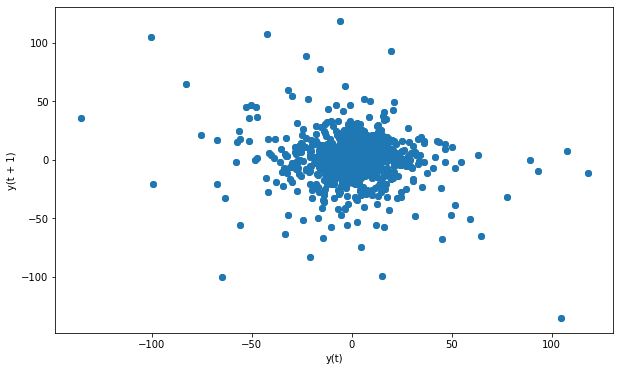

In [183]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,6))
lag_plot(dataframe)
plt.show()

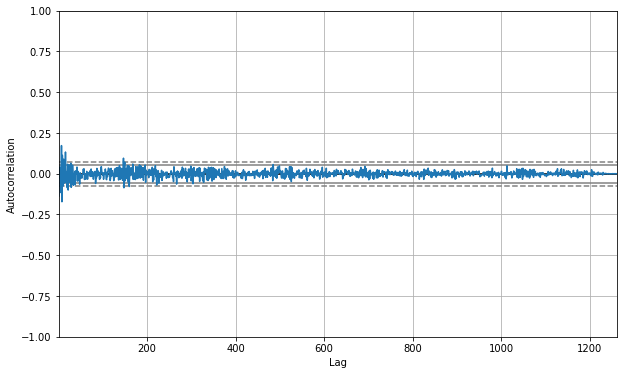

In [188]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,6))
lags=100
autocorrelation_plot(dataframe["t+1"])
plt.show()

(0.0, 100.0)

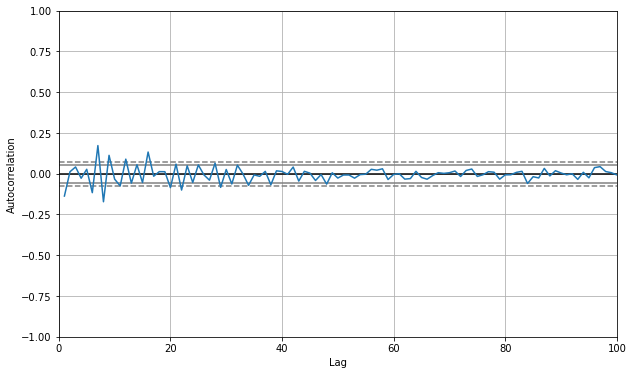

In [200]:
x_limit = plt.figure(figsize=(10,6))
lags=100
x_limit = autocorrelation_plot(dataframe["t+1"])
x_limit.set_xlim([0,100])

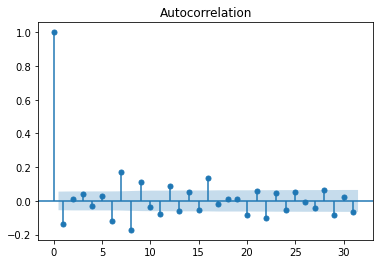

In [196]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataframe["t+1"], lags=31)
plt.show()

In [201]:
updated_df.head()

,detrended_Stock
Date,
2015-06-09,-0.140015
2015-06-10,10.000000
2015-06-11,-2.080017
2015-06-12,-2.279968
2015-06-15,-5.130005


In [202]:
values2 = pd.DataFrame(updated_df.values)
dataframe2 = pd.concat([values2.shift(2),values2.shift(1), values2], axis=1)
dataframe2.columns = ['t-1','t', 't+1']
result2 = dataframe2.corr()
print(result2)


          t-1         t       t+1
t-1  1.000000 -0.137223  0.012229
t   -0.137223  1.000000 -0.136994
t+1  0.012229 -0.136994  1.000000


Based on the autocorrelation plots we see there is no correlation with the lagged variable therefore AR model is not useful in this case for prediction

# Q9

we will keep last 5 obervations as test sample which will also be prediction for next 5 times step

In [209]:
from statsmodels.tsa.ar_model import AR
X=dataframe.values
train_size=len(X)-5
train, test=X[1:train_size], X[train_size:]
train_X, train_y=train[:,0],train[:,1]
test_X,test_y=test[:,0],test[:,1]

In [213]:
train_pred = [x for x in train_X]
## generating residuals through persistence model
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals using AR model
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

Lag=23, Coef=[ 0.02544198 -1.03728665 -1.02183723 -0.92352922 -0.89016417 -0.8410574
 -0.88661915 -0.7076263  -0.78191261 -0.65775134 -0.63453999 -0.64841241
 -0.54735255 -0.49468918 -0.46015986 -0.38827473 -0.25947088 -0.18030035
 -0.10143894 -0.09466971 -0.09896269 -0.04886126 -0.06904843 -0.01399812]
C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameter

now we correct the errors

predicted error=3.769407, expected error=-21.359985
predicted error=22.054094, expected error=50.409912
predicted error=-23.369140, expected error=-17.989991
predicted error=-5.343535, expected error=1.330079
predicted error=-3.123269, expected error=0.139893
Test RMSE: 17.434


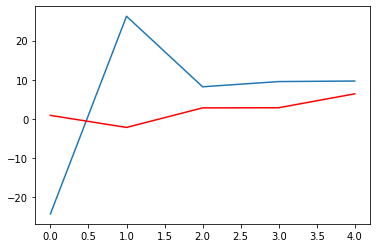

In [214]:
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
# persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
# predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

The value of RSME of  17.434 is lower than that of persistence model (RMSE: 22.194) indicating that MA model better fit

# Q10

We will again use last 5 observations as a forecast and caculate RSME

We will use grid search to find the best order for ARIMA and make a prediction for last 5 observations

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
import warnings
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) - 5)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                print(order)
               
                rmse = evaluate_arima_model(dataset, order)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))
               
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [11]:
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 2)
q_values = range(0, 4)
warnings.filterwarnings('ignore')
evaluate_models(ts_series.values, p_values, d_values, q_values)

(0, 0, 0)
ARIMA(0, 0, 0) RMSE=461.847
(0, 0, 1)
ARIMA(0, 0, 1) RMSE=235.138
(0, 0, 2)
ARIMA(0, 0, 2) RMSE=162.180
(0, 0, 3)
ARIMA(0, 0, 3) RMSE=101.077
(0, 1, 0)
ARIMA(0, 1, 0) RMSE=17.239
(0, 1, 1)
ARIMA(0, 1, 1) RMSE=17.026
(0, 1, 2)
ARIMA(0, 1, 2) RMSE=17.077
(0, 1, 3)
ARIMA(0, 1, 3) RMSE=17.109
(1, 0, 0)
ARIMA(1, 0, 0) RMSE=17.697
(1, 0, 1)
ARIMA(1, 0, 1) RMSE=17.502
(1, 0, 2)
ARIMA(1, 0, 2) RMSE=17.557
(1, 0, 3)
ARIMA(1, 0, 3) RMSE=17.592
(1, 1, 0)
ARIMA(1, 1, 0) RMSE=17.063
(1, 1, 1)
ARIMA(1, 1, 1) RMSE=17.056
(1, 1, 2)
ARIMA(1, 1, 2) RMSE=16.526
(1, 1, 3)
ARIMA(1, 1, 3) RMSE=16.380
(2, 0, 0)
ARIMA(2, 0, 0) RMSE=17.536
(2, 0, 1)
ARIMA(2, 0, 1) RMSE=17.533
(2, 0, 2)
ARIMA(2, 0, 2) RMSE=17.015
(2, 0, 3)
ARIMA(2, 0, 3) RMSE=16.862
(2, 1, 0)
ARIMA(2, 1, 0) RMSE=17.052
(2, 1, 1)
ARIMA(2, 1, 1) RMSE=16.308
(2, 1, 2)
ARIMA(2, 1, 2) RMSE=17.812
(2, 1, 3)
ARIMA(2, 1, 3) RMSE=18.108
(4, 0, 0)
ARIMA(4, 0, 0) RMSE=17.525
(4, 0, 1)
ARIMA(4, 0, 1) RMSE=16.686
(4, 0, 2)
ARIMA(4, 0, 2) RMSE=18.3

we see that order(4,1,1) serves the best RMSE for prediction of next 5 observation

# Q11

We saw that we could not use AR model as there were no autocorrelation woth lagged features therefore AR model was not suitable for prediction.
With respect to MA and ARIMA we saw that ARIMA with order (4,1,1) gave the lowest RSME (15.902) compared to baseline model's RSME (RMSE: 22.194) and even compared to MA model therefore ARIMA is the best model for use with this data